# Figures
-------------

This notebook contains the code to generate all figures in the main text of the accompanying paper.

#### Table of Contents

- [superscreen.Parameter demo](#Parameter-demo)
- [Figure 1: Ring with a slit (Code Block 1)](#Figure-1:-Ring-with-a-slit-(Code-Block-1))
- [Figure 2: Fluxoid optimization](#Figure-2:-Fluxoid-optimization)
- [Figure 3: Pearl Vortices](#Figure-3:-Pearl-Vortices)
- [Figure 4: Ring self-inductance](#Figure-4:-Ring-self-inductance)
- [Figure 5: SQUID mutual inductance](#Figure-5:-SQUID-mutual-inductance)
- [Figure 6: SQUID susceptometry image of a SQUID susceptometer](#Figure-6:-SQUID-susceptometry-image-of-a-SQUID-susceptometer)

In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import os
import sys
import time
import string
import logging
import tempfile

logging.basicConfig(level=logging.INFO)

os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import inset_locator
import matplotlib.font_manager as fm
from IPython.display import clear_output

plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams["font.size"] = 18
plt.rcParams["savefig.dpi"] = 600

SAVE_FIGURES = True

if SAVE_FIGURES:
    os.makedirs(os.path.join(os.pardir, "images"), exist_ok=True)

sys.path.insert(0, os.pardir)
import squids

In [2]:
import superscreen as sc

sc.version_table()

## `Parameter` demo

### Table of Contents

- **[superscreen.Parameter demo](#Parameter-demo)**
- [Figure 1: Ring with a slit (Code Block 1)](#Figure-1:-Ring-with-a-slit-(Code-Block-1))
- [Figure 2: Fluxoid optimization](#Figure-2:-Fluxoid-optimization)
- [Figure 3: Pearl Vortices](#Figure-3:-Pearl-Vortices)
- [Figure 4: Ring self-inductance](#Figure-4:-Ring-self-inductance)
- [Figure 5: SQUID mutual inductance](#Figure-5:-SQUID-mutual-inductance)
- [Figure 6: SQUID susceptometry image of a SQUID susceptometer](#Figure-6:-SQUID-susceptometry-image-of-a-SQUID-susceptometer)

In [3]:
from superscreen import Parameter


def f(x, y, a=1, b=0):
    return a * x**2 + b * y


param = Parameter(f, a=0, b=1)
print(param)  # Parameter<f(a=0, b=1)>

other_param = Parameter(f, a=2, b=3)
print(other_param)  # Parameter<f(a=2, b=3)>

print(param(0, 0) == f(0, 0, a=0, b=1))  # True
print(other_param(1, 2) == f(1, 2, a=2, b=3))  # True

param_squared = param**2
print(param_squared)  # CompositeParameter<(f(a=0, b=1) ** 2)>

print(param_squared(3, 4) == f(3, 4, a=0, b=1) ** 2)  # True
print(
    (5 * param_squared / other_param)(5, 6)
    == 5 * f(5, 6, a=0, b=1) ** 2 / f(5, 6, a=2, b=3)
)  # True

Parameter<f(a=0, b=1)>
Parameter<f(a=2, b=3)>
True
True
CompositeParameter<(f(a=0, b=1) ** 2)>
True
True


## Figure 1: Ring with a slit (Code Block 1)

#### Table of Contents

- [superscreen.Parameter demo](#Parameter-demo)
- **[Figure 1: Ring with a slit (Code Block 1)](#Figure-1:-Ring-with-a-slit-(Code-Block-1))**
- [Figure 2: Fluxoid optimization](#Figure-2:-Fluxoid-optimization)
- [Figure 3: Pearl Vortices](#Figure-3:-Pearl-Vortices)
- [Figure 4: Ring self-inductance](#Figure-4:-Ring-self-inductance)
- [Figure 5: SQUID mutual inductance](#Figure-5:-SQUID-mutual-inductance)
- [Figure 6: SQUID susceptometry image of a SQUID susceptometer](#Figure-6:-SQUID-susceptometry-image-of-a-SQUID-susceptometer)

In [4]:
import superscreen as sc
from superscreen.geometry import circle, box

length_units = "um"
ro = 3  # outer radius
ri = 1  # inner radius
slit_width = 0.25
layer = sc.Layer("base", Lambda=1.0, z0=0)

ring = circle(ro)
hole = circle(ri)
slit = box(slit_width, 1.5 * (ro - ri), center=(0, -(ro + ri) / 2))

film = sc.Polygon.from_difference(
    [ring, slit, hole], name="ring_with_slit", layer="base"
).resample(500)
bounding_box = sc.Polygon("bounding_box", layer="base", points=circle(1.2 * ro))

device = sc.Device(
    film.name,
    layers=[layer],
    films=[film],
    abstract_regions=[bounding_box],
    length_units=length_units,
)

INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Finished generating mesh with 3629 points and 7096 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.
INFO:superscreen.device.device:Calculating gradient matrix.
INFO:superscreen.solve:Calculating base response to applied field.


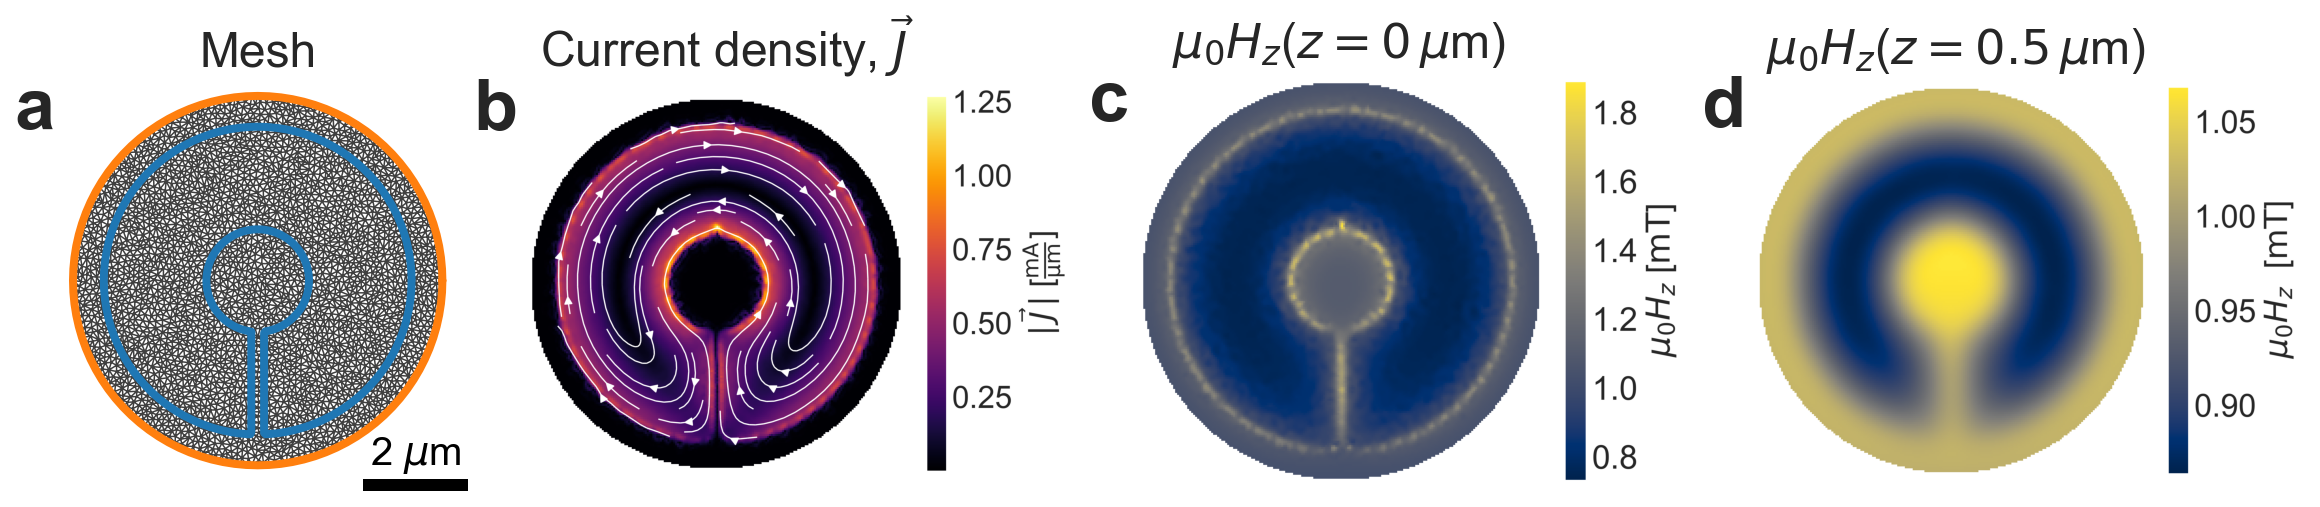

In [5]:
fig, axes = plt.subplots(
    1,
    4,
    figsize=(16, 4),
    facecolor="w",
    constrained_layout=True,
    gridspec_kw=dict(width_ratios=[0.725, 1, 1, 1]),
)

device.make_mesh(min_points=3500, optimesh_steps=None)

solution = sc.solve(
    device,
    applied_field=sc.sources.ConstantField(1),
    field_units="mT",
    current_units="mA",
)[-1]

device.plot(
    ax=axes[0],
    lw=4,
    legend=False,
    mesh=True,
    mesh_kwargs=dict(color="k", lw=0.75, alpha=0.75),
)

scale = 2
um = "$\\mu$m"
scalebar = AnchoredSizeBar(
    transform=axes[0].transData,
    size=scale,
    size_vertical=scale / 10,
    loc="lower right",
    label=f"{scale} {um}",
    color="k",
    frameon=False,
    label_top=True,
    pad=-0.25,
    fontproperties=fm.FontProperties(size=20),
)
axes[0].add_artist(scalebar)

# Sub-figure for current density
fig_j, (ax_j,) = solution.plot_currents(figsize=(5, 4))
ax_j.axis("off")
ax_j.set_title("")

# Sub-figure for magnetic field at z = 0 um
fig_h, (ax_h,) = solution.plot_fields(figsize=(5, 4))
ax_h.axis("off")
ax_h.set_title("")

# Sub-figure for magnetic field at z = 0.5 um
fig_hf, (ax_hf,) = solution.plot_field_at_positions(
    device.points, zs=0.5, figsize=(5, 4)
)
ax_hf.axis("off")
ax_hf.set_title("")

# Save sub-figures to a temporary directory and load them as images.
with tempfile.TemporaryDirectory() as path:
    fig_h.savefig(os.path.join(path, "fields.png"), bbox_inches="tight")
    fig_j.savefig(os.path.join(path, "currents.png"), bbox_inches="tight")
    fig_hf.savefig(os.path.join(path, "fields_at_position.png"), bbox_inches="tight")
    im_h = plt.imread(os.path.join(path, "fields.png"))
    im_j = plt.imread(os.path.join(path, "currents.png"))
    im_hf = plt.imread(os.path.join(path, "fields_at_position.png"))

plt.close(fig_h)
plt.close(fig_j)
plt.close(fig_hf)

axes[1].imshow(im_j)
axes[2].imshow(im_h)
axes[3].imshow(im_hf)

titles = [
    "Mesh",
    "Current density, $\\vec{J}$",
    "$\\mu_0H_z$($z=0\\,\\mu$m)",
    "$\\mu_0H_z$($z=0.5\\,\\mu$m)",
]

for i, (ax, label, title) in enumerate(zip(axes, string.ascii_lowercase, titles)):
    ax.set_aspect("equal")
    ax.grid(False)
    ax.axis("off")
    ax.set_title(title, x=0.5 - 0.125 * bool(i), fontsize=24)
    ax.text(
        0,
        1,
        label,
        weight="bold",
        size=36,
        transform=ax.transAxes,
        ha="right",
        va="top",
    )

if SAVE_FIGURES:
    fig.savefig("../images/ring_with_slit.pdf", bbox_inches="tight")

## Figure 2: Fluxoid optimization

#### Table of Contents

- [superscreen.Parameter demo](#Parameter-demo)
- [Figure 1: Ring with a slit (Code Block 1)](#Figure-1:-Ring-with-a-slit-(Code-Block-1))
- **[Figure 2: Fluxoid optimization](#Figure-2:-Fluxoid-optimization)**
- [Figure 3: Pearl Vortices](#Figure-3:-Pearl-Vortices)
- [Figure 4: Ring self-inductance](#Figure-4:-Ring-self-inductance)
- [Figure 5: SQUID mutual inductance](#Figure-5:-SQUID-mutual-inductance)
- [Figure 6: SQUID susceptometry image of a SQUID susceptometer](#Figure-6:-SQUID-susceptometry-image-of-a-SQUID-susceptometer)

In [6]:
from superscreen.geometry import box, circle, ellipse

length_units = "um"

layers = [
    sc.Layer("base", Lambda=0.25, z0=0),
]

films = [
    sc.Polygon("film", layer="base", points=box(8, 4)),
]

holes = [
    sc.Polygon(
        "hole0", layer="base", points=ellipse(2.5, 1, center=(0.5, -0.25))
    ).resample(100),
    sc.Polygon("hole1", layer="base", points=box(1, 2.5, center=(-3, 0.25))).resample(
        50
    ),
]

abstract_regions = [
    sc.Polygon("bounding_box", layer="base", points=box(10, 6)),
]

device = sc.Device(
    "rect",
    layers=layers,
    films=films,
    holes=holes,
    abstract_regions=abstract_regions,
    length_units=length_units,
)

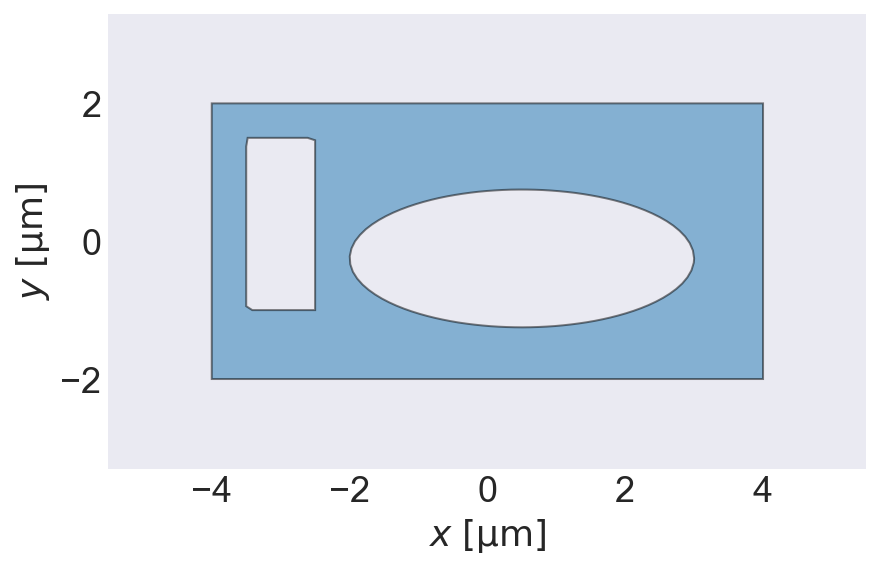

In [7]:
fig, ax = device.draw(exclude="bounding_box")

In [8]:
device.make_mesh(min_points=5_000, optimesh_steps=None)

INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Finished generating mesh with 5449 points and 10665 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.
INFO:superscreen.device.device:Calculating gradient matrix.


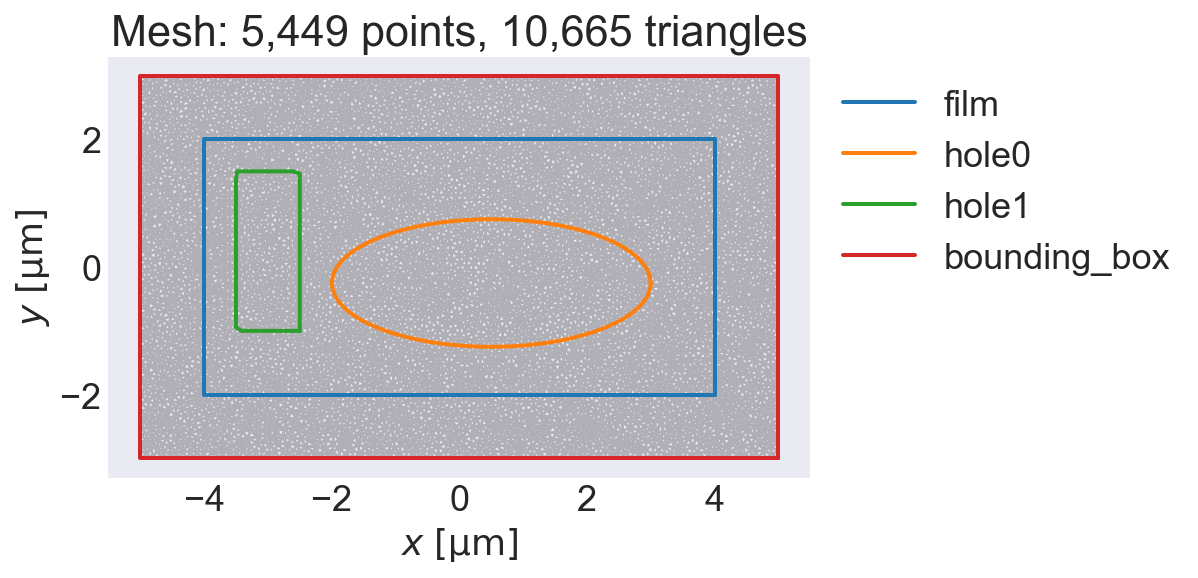

In [9]:
fig, ax = device.plot(
    figsize=(8, 4), mesh=True, lw=2, mesh_kwargs=dict(color="k", alpha=0.25)
)
ax.grid(False)
_ = ax.set_title(
    f"Mesh: {device.points.shape[0]:,} points, "
    f"{device.triangles.shape[0]:,} triangles"
)

In [10]:
M = device.mutual_inductance_matrix(units="pH")
print(f"Mutual inductance matrix shape:", M.shape)
display(M)

INFO:superscreen.device.device:Evaluating 'rect' mutual inductance matrix column (1/2), source = 'hole0'.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.device.device:Evaluating fluxoids for solution 1/1.
INFO:superscreen.device.device:Evaluating 'rect' mutual inductance matrix column (2/2), source = 'hole1'.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.device.device:Evaluating fluxoids for solution 1/1.


Mutual inductance matrix shape: (2, 2)


array([[10.34440979, -1.52983379],
       [-1.52198107,  7.03736106]]) <Unit('picohenry')>

In [11]:
asymmetry = float(abs((M[0, 1] - M[1, 0]) / min(abs(M[0, 1]), abs(M[1, 0]))))
print(f"Mutual inductance matrix fractional asymmetry: {100 * asymmetry:.3f}%")

Mutual inductance matrix fractional asymmetry: 0.516%


In [12]:
# n = 0 fluxoid state, apply a field of 1 mT
solution, result = sc.find_fluxoid_solution(
    device,
    fluxoids=dict(hole0=0, hole1=0),
    applied_field=sc.sources.ConstantField(1),
    field_units="mT",
    current_units="mA",
)

INFO:superscreen.fluxoid:Finding fluxoid solution using least-squares minimization...
INFO:superscreen.fluxoid:Solving device with circulating_currents={'hole0': 0.0, 'hole1': 0.0}.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.fluxoid:Hole hole0: target = 0.000e+00 Phi_0, actual = 7.186e+00 Phi_0.
INFO:superscreen.fluxoid:Hole hole1: target = 0.000e+00 Phi_0, actual = 2.524e+00 Phi_0.
INFO:superscreen.fluxoid:Total cost = 5.801e+01 Phi_0 ** 2.
INFO:superscreen.fluxoid:Solving device with circulating_currents={'hole0': 1.4901161193847656e-08, 'hole1': 0.0}.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.fluxoid:Hole hole0: target = 0.000e+00 Phi_0, actual = 7.186e+00 Phi_0.
INFO:superscreen.fluxoid:Hole hole1: target = 0.000e+00 Phi_0, actual = 2.524e+00 Phi_0.
INFO:superscreen.fluxoid:Total cost = 5.801e+01 Phi_0 ** 2.
INFO:superscreen.fluxoid:Solving device with circulating_currents={'hole0': 0.0, 'hole1': 1.4

In [13]:
I_circ = solution.circulating_currents
fluxoids = [
    sum(solution.hole_fluxoid(hole)).to("Phi_0").magnitude for hole in device.holes
]
print("Least-squares minimization result:\n")
print(result)
print(f"\nTotal circulating current: {I_circ} mA.")
print(f"Total fluxoid: {fluxoids} Phi_0.")

Least-squares minimization result:

      fun: 3.3469878161925305e-15
 hess_inv: array([[0.02232947, 0.01142458],
       [0.01142458, 0.04706716]])
      jac: array([-1.74011683e-08,  1.25512423e-09])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.59719067, -1.08712778])

Total circulating current: {'hole0': -1.5971906695558724, 'hole1': -1.087127763830587} mA.
Total fluxoid: [-5.6165779582784126e-08, 1.4529137226659827e-08] Phi_0.


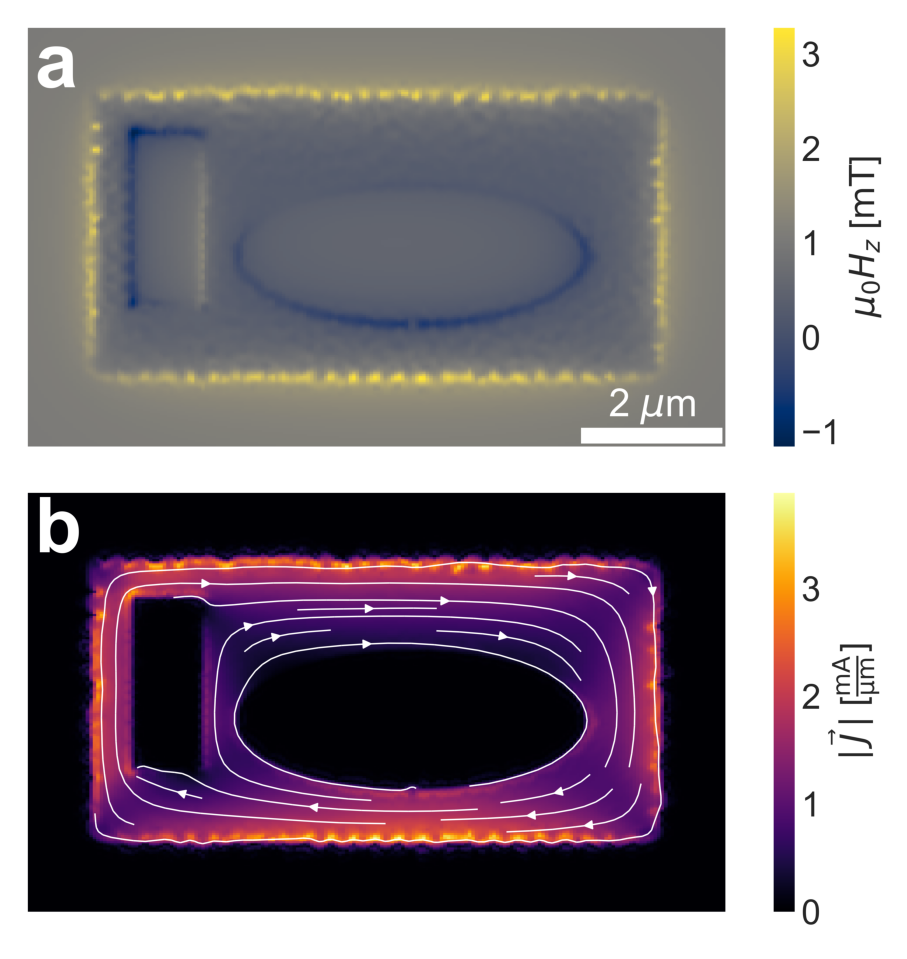

In [14]:
fig_h, axes_h = solution.plot_fields(figsize=(9, 4))
fig_j, axes_j = solution.plot_currents(figsize=(9, 4))

for ax, label in zip(list(axes_h.flat) + list(axes_j.flat), string.ascii_lowercase):
    ax.axis("off")
    ax.set_title("")
    ax.text(
        0.01,
        0.99,
        label,
        color="w",
        weight="bold",
        size=40,
        transform=ax.transAxes,
        ha="left",
        va="top",
    )

scale = 2
um = "$\\mu$m"
scalebar = AnchoredSizeBar(
    transform=axes_h[0].transData,
    size=scale,
    size_vertical=scale / 10,
    loc="lower right",
    label=f"{scale} {um}",
    color="w",
    frameon=False,
    label_top=True,
    pad=0,
    fontproperties=fm.FontProperties(size=20),
)
axes_h[0].add_artist(scalebar)

# Save sub-figures to a temporary directory and load them as images.
with tempfile.TemporaryDirectory() as path:
    fig_h.savefig(os.path.join(path, "fields.png"), bbox_inches="tight")
    fig_j.savefig(os.path.join(path, "currents.png"), bbox_inches="tight")
    im_h = plt.imread(os.path.join(path, "fields.png"))
    im_j = plt.imread(os.path.join(path, "currents.png"))

plt.close(fig_h)
plt.close(fig_j)

# Create the final figure.
fig, (ax, bx) = plt.subplots(
    2,
    1,
    figsize=(8, 7),
    sharex=True,
    sharey=True,
)
ax.imshow(im_h)
bx.imshow(im_j)
for a in (ax, bx):
    a.axis("off")

fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)

if SAVE_FIGURES:
    fig.savefig("../images/fluxoid.pdf", bbox_inches="tight")

## Figure 3: Pearl Vortices

#### Table of Contents

- [superscreen.Parameter demo](#Parameter-demo)
- [Figure 1: Ring with a slit (Code Block 1)](#Figure-1:-Ring-with-a-slit-(Code-Block-1))
- [Figure 2: Fluxoid optimization](#Figure-2:-Fluxoid-optimization)
- **[Figure 3: Pearl Vortices](#Figure-3:-Pearl-Vortices)**
- [Figure 4: Ring self-inductance](#Figure-4:-Ring-self-inductance)
- [Figure 5: SQUID mutual inductance](#Figure-5:-SQUID-mutual-inductance)
- [Figure 6: SQUID susceptometry image of a SQUID susceptometer](#Figure-6:-SQUID-susceptometry-image-of-a-SQUID-susceptometer)

In [15]:
# Create a device representing square thin film.
device = sc.Device(
    "film",
    layers=[sc.Layer("base", Lambda=0, z0=0)],
    films=[sc.Polygon("film", layer="base", points=sc.geometry.box(20))],
    # Add an abstract_polygon near the vortex position so that
    # that region will be meshed densely.
    abstract_regions=[
        sc.Polygon(f"circle{i}", layer="base", points=sc.geometry.circle(r))
        for i, r in enumerate([0.05, 0.1, 0.5, 1, 2])
    ],
    length_units="um",
)
device.make_mesh(min_points=4000, optimesh_steps=10)
# Specify the vortex position.
vortices = [sc.Vortex(x=0, y=0, layer="base")]

INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Optimizing mesh with 4038 vertices.
/Users/LoganBVH/opt/anaconda3/envs/superscreen/lib/python3.9/site-packages/meshplex/_mesh_tri.py:345: UserWarning: There are 4 remaining non-Delaunay facets. The signed circumcenter distances are [-4.163336342344337e-17, -2.220446049250313e-16, -4.9873299934333204e-18, -3.903127820947816e-18]. This can happen due to round-off errors or to prevent non-manifold edges in shell meshes.
  warnings.warn(
INFO:superscreen.device.device:Finished generating mesh with 4038 points and 7904 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.
INFO:superscreen.device.device:Calculating gradient matrix.


In [16]:
# Specify coordinates at which to calculate a cross-section of the
# resulting field distribution.
cut_x = np.linspace(-4, 4, 201)  # [device.length_units]
cut_y = 0 * np.ones_like(cut_x)
cut_z = 1 * np.ones_like(cut_x)
x_cut_coords = np.stack([cut_x, cut_y, cut_z], axis=1)
z_cut_coords = np.linspace(0.2, 5, 81)
Bz_x_cuts = []
Bz_x_cuts_fourier = []
Bz_z_cuts = []
Bz_z_cuts_fourier = []

fluxoid_radius = 1  # microns
fluxoids = []
solutions = []
fluxoid_polygon = sc.geometry.circle(fluxoid_radius, points=201)
# Sweep Lambda, solve the model, and evaluate the field at the given coordinates.
Lambdas = np.linspace(0, 2, 5)  # [device.length_units]

for Lambda in Lambdas:
    device.layers["base"].Lambda = Lambda
    solution = sc.solve(device=device, vortices=vortices, field_units="Phi_0/um**2")[-1]
    solutions.append(solution)
    fluxoids.append(
        solution.polygon_fluxoid(
            fluxoid_polygon,
            grid_shape=200,
            with_units=False,
        )["base"]
    )
    Bz_x = solution.field_at_position(x_cut_coords).m
    Bz_x_cuts.append(Bz_x)
    Bz_z = solution.field_at_position((0, 0), zs=z_cut_coords).m
    Bz_z_cuts.append(Bz_z)

    # Fourier transform calculation of Pearl vortex field profile
    xmin, xmax = device.points[:, 0].min(), device.points[:, 0].max()
    ymin, ymax = device.points[:, 1].min(), device.points[:, 1].max()
    x = np.linspace(xmin, xmax, 512)
    y = np.linspace(ymin, ymax, 512)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    phi_0 = 1
    z0 = cut_z[0]
    kmaxx = np.pi / dx
    kmaxy = np.pi / dy
    kx = np.linspace(-kmaxx, kmaxx, x.shape[0])
    ky = np.linspace(-kmaxy, kmaxy, y.shape[0])
    KX, KY = np.meshgrid(kx, ky)
    K = np.sqrt(KX**2 + KY**2)
    # Pearl vortex field distribution in Fourier space
    hzk = phi_0 * np.exp(-K * z0) / (1 + K * 2 * Lambda)
    hzk = np.fft.fftshift(hzk)
    # Inverse Fourier-transform to get real-space field distribution
    hzf = np.abs(np.fft.ifft2(hzk))
    hzf = np.fft.fftshift(hzf) / (dx * dy)
    hzf = (hzf * device.ureg("Phi_0 / um ** 2")).to(solution.field_units).m
    y0 = np.argmin(np.abs(y - 0))
    Bz_x_cuts_fourier.append(np.interp(cut_x, x, hzf[y0, :]))
    hzz = []
    for z0 in z_cut_coords:
        # Pearl vortex field distribution in Fourier space
        hzk = phi_0 * np.exp(-K * z0) / (1 + K * 2 * Lambda)
        hzk = np.fft.fftshift(hzk)
        # Inverse Fourier-transform to get real-space field distribution
        hzf = np.abs(np.fft.ifft2(hzk))
        hzf = np.fft.fftshift(hzf) / (dx * dy)
        hzz.append(hzf.max())
    Bz_z_cuts_fourier.append(
        (np.array(hzz) * device.ureg("Phi_0 / um ** 2")).to(solution.field_units).m
    )

INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.solve:Calculating base response to applied field.


<ipython-input-17-af9ea8ead9a1>:167: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = left_inset.pcolormesh(
<ipython-input-17-af9ea8ead9a1>:182: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, cax=cax, orientation="horizontal")
<ipython-input-17-af9ea8ead9a1>:190: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = right_inset.pcolormesh(xgrid, ygrid, hz, cmap="cividis", shading="auto", vmin=0)
<ipython-input-17-af9ea8ead9a1>:220: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor

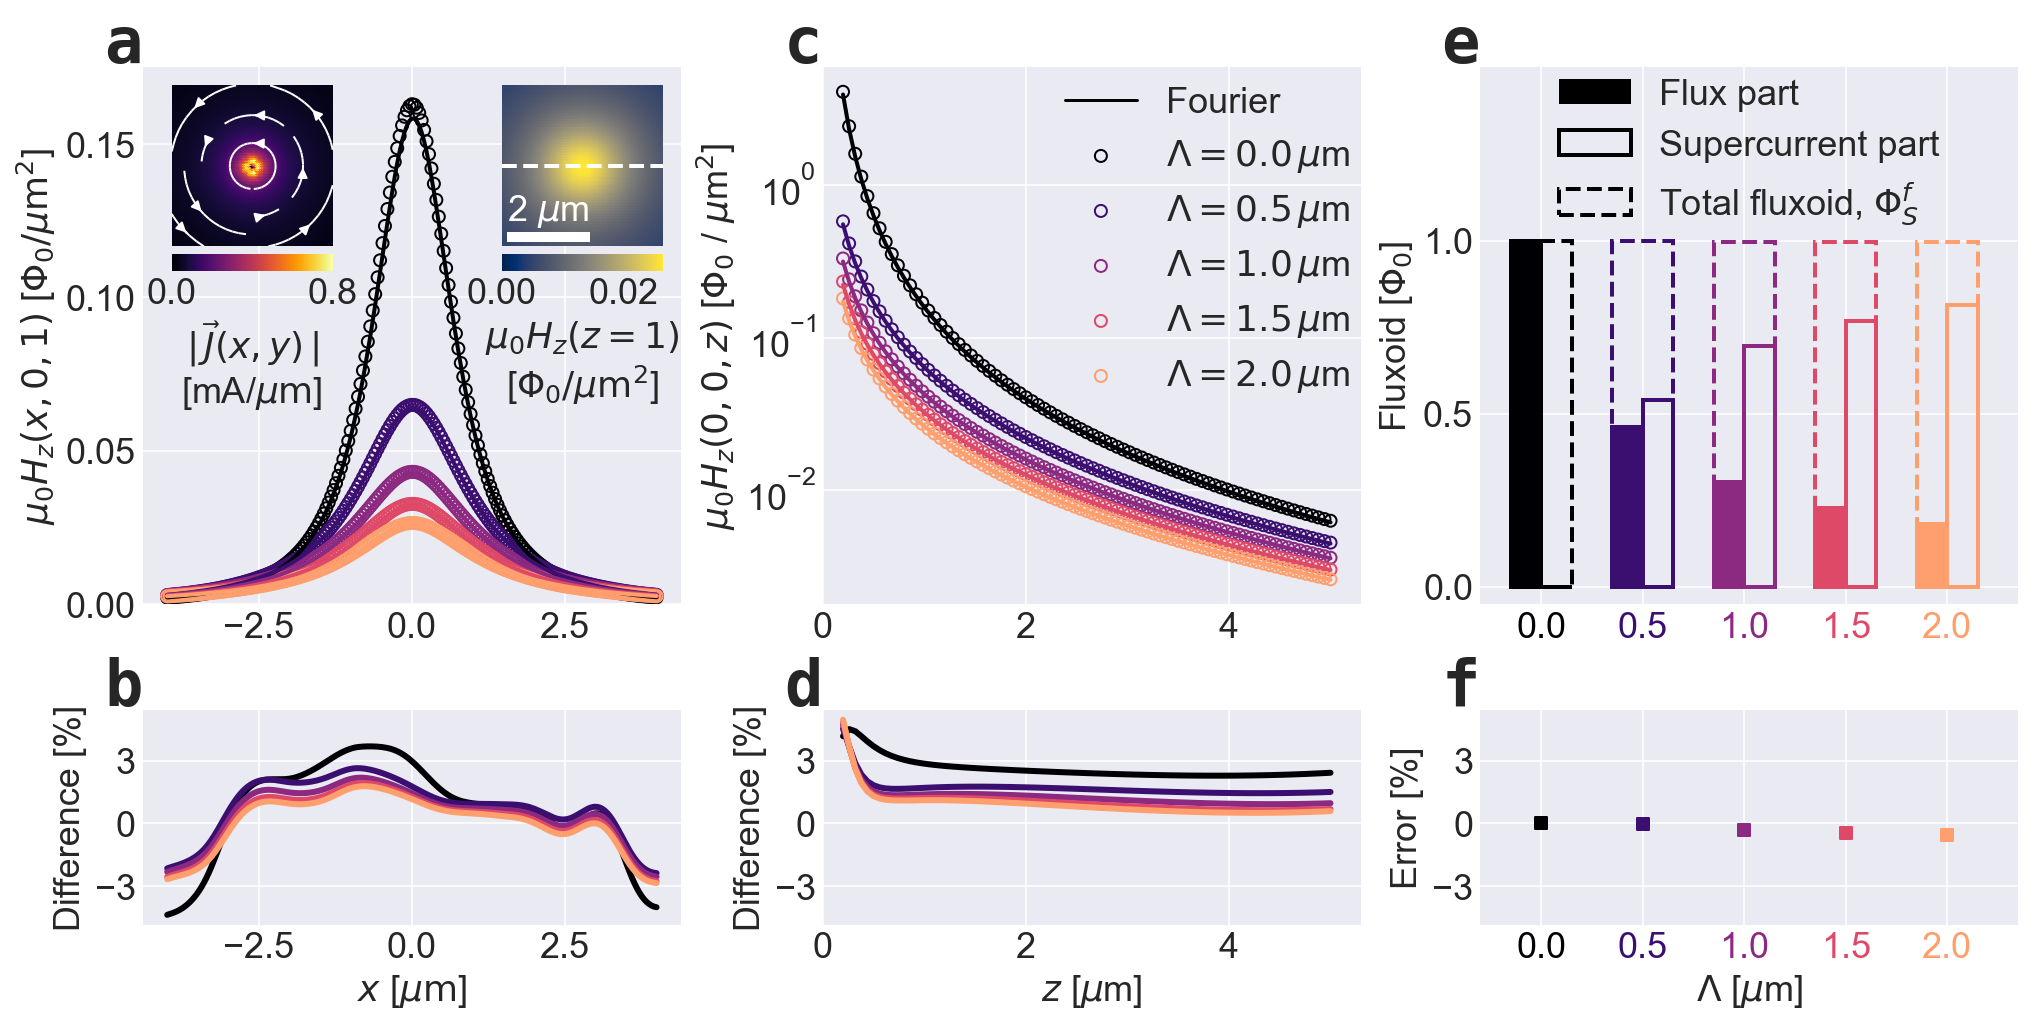

In [17]:
add_titles = False

fig, axes = plt.subplots(
    2,
    3,
    figsize=(14, 7),
    constrained_layout=True,
    gridspec_kw=dict(height_ratios=[2.5, 1]),
)
(ax, bx), (cx, dx), (ex, fx) = axes.T
colors = plt.get_cmap("magma")(np.linspace(0, 1, Lambdas.size + 1))

for hz, hzf, Lambda, color in zip(Bz_x_cuts, Bz_x_cuts_fourier, Lambdas, colors):
    label = f"$\\Lambda={{{Lambda:.1f}}}\\,\\mu$m"
    ax.scatter(cut_x, hz, marker="o", color=color, label=label, fc="none")
    ax.plot(cut_x, hzf, "-", color=color, lw=2, alpha=1)
    bx.plot(cut_x, 100 * (hz - hzf) / hzf, color=color, lw=3, label=label)

ax.set_ylim(0, 0.175)
ax.set_ylabel("$\\mu_0H_z(x, 0, 1)$ [$\\Phi_0 / \\mu\\mathrm{m}^2$]")
ax.set_yticks([0, 0.05, 0.1, 0.15])
bx.set_xlabel("$x$ [$\\mu\\mathrm{m}$]")
bx.set_ylabel("Difference [%]")
bx.sharex(ax)

cx.plot(-1, 1, "k-", label="Fourier")
for i, (hz, hzz, Lambda, color) in enumerate(
    zip(Bz_z_cuts, Bz_z_cuts_fourier, Lambdas, colors)
):
    cx.scatter(
        z_cut_coords,
        hz,
        marker="o",
        fc="none",
        color=color,
        label=f"$\\Lambda = {{{Lambda:.1f}}}\\,\\mu$m",
    )
    cx.plot(z_cut_coords, hzz, f"-", lw=2, color=color)

    dx.plot(
        z_cut_coords,
        100 * (hz - hzz) / hzz,
        f"-",
        color=color,
        lw=3,
        label=f"$\\Lambda = {{{Lambda:.1f}}}\\,\\mu$m",
    )
cx.set_ylabel("$\\mu_0H_z(0, 0, z)$ [$\\Phi_0$ / $\\mu$m${}^2$]")
cx.legend(bbox_to_anchor=(1.04, 1.025), loc="upper right", fontsize=18)
cx.set_xlim(0, cx.get_xlim()[1])
cx.set_yscale("log")
dx.set_xlabel("$z$ [$\\mu$m]")
dx.set_ylabel("Difference [%]")
dx.sharey(bx)
dx.sharex(cx)
fx.sharey(dx)
dx.set_yticks([-3.0, 0, 3.0])

# Plot fluxoid values as bars
width = 0.3
lw = 2
ex.bar(-2, 1, color="k", lw=2, label="Flux part")
ex.bar(-2, 1, color="k", fill=False, ls="-", lw=2, label="Supercurrent part")
ex.bar(-2, 1, color="k", fill=False, ls="--", lw=2, label="Total fluxoid, $\\Phi_S^f$")
for i, (fluxoid, Lambda, color) in enumerate(zip(fluxoids, Lambdas, colors)):
    ex.bar(
        i - width / 2,
        fluxoid.flux_part,
        fc=color,
        ec=color,
        lw=lw,
        width=width,
    )
    ex.bar(
        i + width / 2,
        fluxoid.supercurrent_part,
        fill=False,
        ec=color,
        lw=lw,
        ls="-",
        width=width,
    )
    ex.bar(
        i,
        sum(fluxoid),
        ec=color,
        fill=False,
        lw=lw,
        ls="--",
        zorder=12,
        width=2 * width,
    )
    fx.scatter(i, 100 * (sum(fluxoid) - 1), color=color, marker="s")

ex.set_yticks([0, 0.5, 1])
ex.set_xlim(-2 * width, len(Lambdas) - width)
ex.set_ylim(-0.05, 1.5)
ex.legend(bbox_to_anchor=(0.5, 1.04), loc="upper center", fontsize=18)
ex.set_ylabel("Fluxoid [$\\Phi_0$]")
fx.set_xlabel("$\\Lambda$ [$\\mu$m]")
fx.set_ylabel("Error [%]")
fx.sharex(ex)

for a in (ex, fx):
    a.set_xticks(range(len(Lambdas)))
    a.set_xticklabels(Lambdas)
    for label, color in zip(a.xaxis.get_ticklabels(), colors):
        label.set_color(color)

# Label all subplots
for a, s in zip(axes.T.flat, string.ascii_lowercase):
    y0 = 1.1 if a in axes[0] else 1.25
    a.text(
        0,
        y0,
        s,
        family="monospace",
        weight="bold",
        size=32,
        transform=a.transAxes,
        ha="right",
        va="top",
    )

if add_titles:
    ax.set_title("$\\mu_0H_z(x, y, z)$ vs. $x$\nat $y=0\\,\\mu$m, $z = 1\\,\\mu$m")
    cx.set_title("$\\mu_0H_z(x, y, z)$ vs. $z$\nat $x=y=0\\,\\mu$m")
    ex.set_title(
        f"Fluxoid for a circle centered\non the vortex with $r={{{fluxoid_radius}}}\\,\\mu$m"
    )

# Add two insets to upper left panel
left_inset = inset_locator.inset_axes(
    ax,
    height="30%",
    width="30%",
    loc="upper left",
    bbox_to_anchor=(0.02, 0, 1, 1),
    bbox_transform=ax.transAxes,
)

right_inset = inset_locator.inset_axes(
    ax,
    height="30%",
    width="30%",
    loc="upper right",
    bbox_to_anchor=(0, 0, 1, 1),
    bbox_transform=ax.transAxes,
)
fontsize = 14

inset_solution = solutions[-1]
xgrid, ygrid = np.meshgrid(*[np.linspace(-2, 2, 101)] * 2)
eval_points = np.stack([xgrid.ravel(), ygrid.ravel()], axis=1)


# Left inset: plot the current density
Js = inset_solution.interp_current_density(
    eval_points,
    units="mA / um",
    with_units=False,
)
Jx, Jy = Js["base"].T
Jx = Jx.reshape(xgrid.shape)
Jy = Jy.reshape(xgrid.shape)
J = np.sqrt(Jx**2 + Jy**2)
im = left_inset.pcolormesh(
    xgrid, ygrid, J, cmap="inferno", shading="auto", vmin=0, vmax=0.8
)
im.set_edgecolor("face")
_ = left_inset.streamplot(xgrid, ygrid, Jx, Jy, color="w", density=0.225, linewidth=1)

cax = inset_locator.inset_axes(
    left_inset,
    width="100%",  # width = 10% of parent_bbox width
    height="10%",  # height : 50%
    loc="lower left",
    bbox_to_anchor=(0, -0.15, 1, 1),
    bbox_transform=left_inset.transAxes,
    borderpad=0,
)
fig.colorbar(im, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks([0, 0.8])
cax.set_xlabel("$|\\,\\vec{J}(x, y)\\,|$\n[mA/$\\mu\\mathrm{m}$]")

# Right inset: plot the magnetic field at z = 1 um
hz = inset_solution.field_at_position(
    eval_points, zs=1, units="Phi_0 / um**2", with_units=False
).reshape(xgrid.shape)
im = right_inset.pcolormesh(xgrid, ygrid, hz, cmap="cividis", shading="auto", vmin=0)
im.set_edgecolor("face")
right_inset.axhline(0, ls="--", color="w", lw=2, alpha=1)

# Add scalebar to right inset
scale = 2
um = "$\\mu$m"
scalebar = AnchoredSizeBar(
    transform=right_inset.transData,
    size=scale,
    size_vertical=scale / 10,
    loc="lower left",
    label=f"{scale} {um}",
    color="w",
    frameon=False,
    label_top=True,
    pad=0.05,
    fontproperties=fm.FontProperties(size=18),
)
right_inset.add_artist(scalebar)

cax = inset_locator.inset_axes(
    right_inset,
    width="100%",
    height="10%",
    loc="lower left",
    bbox_to_anchor=(0, -0.15, 1, 1),
    bbox_transform=right_inset.transAxes,
    borderpad=0,
)
fig.colorbar(im, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks([0, 0.02])
cax.set_xlabel("$\\mu_0H_z(z=1)$\n[$\\Phi_0 / \\mu\\mathrm{m}^2$]")

for inset in (left_inset, right_inset):
    inset.set_aspect("equal")
    inset.grid(False)
    inset.set_xlim(-2, 2)
    inset.set_ylim(-2, 2)
    for axis in (inset.xaxis, inset.yaxis):
        axis.set_ticks([])
        axis.set_tick_params(labelsize=fontsize)

if SAVE_FIGURES:
    fig.savefig("../images/pearl.pdf", bbox_inches="tight")

## Figure 4: Ring self-inductance

#### Table of Contents

- [superscreen.Parameter demo](#Parameter-demo)
- [Figure 1: Ring with a slit (Code Block 1)](#Figure-1:-Ring-with-a-slit-(Code-Block-1))
- [Figure 2: Fluxoid optimization](#Figure-2:-Fluxoid-optimization)
- [Figure 3: Pearl Vortices](#Figure-3:-Pearl-Vortices)
- **[Figure 4: Ring self-inductance](#Figure-4:-Ring-self-inductance)**
- [Figure 5: SQUID mutual inductance](#Figure-5:-SQUID-mutual-inductance)
- [Figure 6: SQUID susceptometry image of a SQUID susceptometer](#Figure-6:-SQUID-susceptometry-image-of-a-SQUID-susceptometer)

In [18]:
def make_ring(r1, r2, Lambda, points1, points2):
    layers = [sc.Layer("base", Lambda=Lambda, z0=0)]
    films = [
        sc.Polygon("ring", layer="base", points=sc.geometry.circle(r2, points=points2)),
    ]
    holes = [
        sc.Polygon("hole", layer="base", points=sc.geometry.circle(r1, points=points1)),
    ]
    abstract_regions = [
        sc.Polygon("bbox", layer="base", points=sc.geometry.circle(r2 * 1.2)),
    ]
    return sc.Device(
        "ring",
        layers=layers,
        films=films,
        holes=holes,
        abstract_regions=abstract_regions,
    )

In [19]:
b = 1  # outer radius
a_vals = np.linspace(0.05, 0.975, 21) * b  # inner radius
Lambdas = np.array([0, 0.01, 0.03, 0.1, 0.3]) * b
a_over_b = a_vals / b
Lambda_over_b = Lambdas / b
results = [[] for _ in Lambdas]
mesh_gen_times = []
solve_times = [[] for _ in Lambdas]
fluxoid_times = [[] for _ in Lambdas]

I_circ = sc.Device.ureg("1 mA")
circ_currents = dict(hole=str(I_circ))

for i, a in enumerate(a_vals):
    print(f"({i + 1} / {len(a_vals)})", a, flush=True)
    t0 = time.perf_counter()
    device = make_ring(a, b, 0, 200, 1200)
    device.make_mesh(min_points=4000, optimesh_steps=None)
    mesh_gen_times.append(time.perf_counter() - t0)
    for j, Lambda in enumerate(Lambdas):
        device.layers_list[0].Lambda = Lambda
        # Instead of calling...
        # m = device.mutual_inductance_matrix()[0, 0]
        # ... split up the solve() and hole_fluxoid() calls so we can time them separately.
        t0 = time.perf_counter()
        solution = sc.solve(device, circulating_currents=circ_currents)[-1]
        solve_times[j].append(time.perf_counter() - t0)
        t0 = time.perf_counter()
        m = sum(solution.hole_fluxoid("hole")) / I_circ
        results[j].append((m / (a * device.ureg("mu_0 * um"))).to_base_units().m)
        fluxoid_times[j].append(time.perf_counter() - t0)
    clear_output(wait=True)

(21 / 21) 0.975


INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Finished generating mesh with 4110 points and 8118 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.
INFO:superscreen.device.device:Calculating gradient matrix.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.solve:Calculating base response to applied field.
INFO:superscreen.solve:Calculating base response to applied field.


In [20]:
for label, times in zip(
    ["make_mesh()", "solve()", "hole_fluxoid()"],
    [mesh_gen_times, solve_times, fluxoid_times],
):
    print(f"{label}: {np.mean(times):.3f} +/- {np.std(times):.3f} seconds")

make_mesh(): 6.271 +/- 1.151 seconds
solve(): 1.441 +/- 0.636 seconds
hole_fluxoid(): 2.036 +/- 0.655 seconds


Load results from Brandt & Clem 2005 (DOI: 10.1103/PhysRevB.69.184509) and Khapaev 1997 (DOI: 10.1088/0953-2048/10/6/002).

The CSV files below are Figures 2 and 1 of `10.1103/PhysRevB.69.184509` and `10.1088/0953-2048/10/6/002` respectively,
which were digitized using https://automeris.io/WebPlotDigitizer/.

In [21]:
df = pd.read_csv("../data/brandt_clem_2005_fig2.csv", skiprows=[1])
dfs = [df[df.columns[i : i + 2]].dropna() for i in range(0, len(df.columns), 2)]
for d in dfs:
    d.columns = ["a_over_b", "L_over_mu0a"]
    d.set_index("a_over_b", inplace=True)

In [22]:
dfk = pd.read_csv("../data/khapaev_1997_fig1.csv", skiprows=[1])
dfks = [dfk[dfk.columns[i : i + 2]].dropna() for i in range(0, len(dfk.columns), 2)]
for d in dfks:
    d.columns = ["b_over_a", "L_over_mu0a"]
    d.set_index("b_over_a", inplace=True)

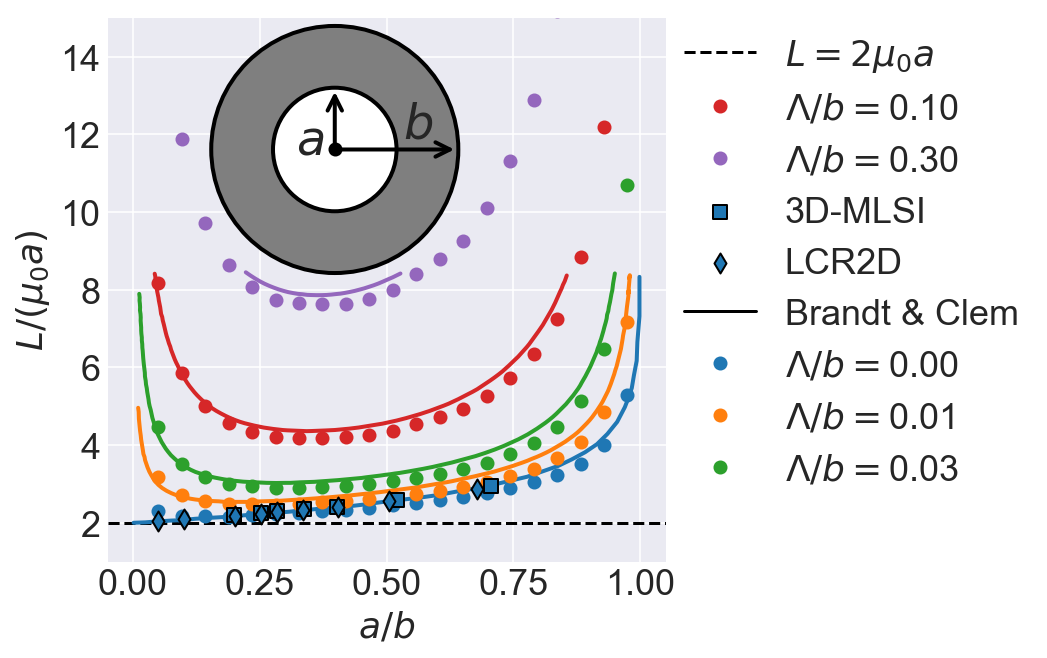

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

kwargs = dict(fc="C0", ec="k", zorder=12, lw=1, s=50)
# Plot analytical result
ax.axhline(2, color="k", ls="--", label="$L = 2\\mu_0 a$")
# Plot Khapaev results
ax.scatter(
    1 / dfks[0].index, dfks[0]["L_over_mu0a"], marker="s", label="3D-MLSI", **kwargs
)
ax.scatter(
    1 / dfks[1].index, dfks[1]["L_over_mu0a"], marker="d", label="LCR2D", **kwargs
)
# Plot Brandt and Clem results
ax.plot(-1, -1, "k-", label="Brandt & Clem")  # Hidden line for the legend
for d, Lambda in zip(dfs, Lambda_over_b):
    ax.plot(d.index, d["L_over_mu0a"].values, lw=2, ls="-")
# Plot SuperScreen results
for i, (L, Lambda) in enumerate(zip(results, Lambda_over_b)):
    ax.plot(
        a_over_b,
        L,
        color=f"C{i}",
        marker="o",
        ls="",
        label=f"$\\Lambda / b = ${Lambda:.2f}",
    )

ax.set_ylim(1, 15)
ax.set_xlim(-0.05, 1.05)
ax.set_xlabel("$a / b$")
ax.set_ylabel("$L / (\\mu_0 a)$")

# Re-order legend items.
handles = list(zip(*ax.get_legend_handles_labels()))
handles = handles[:1] + handles[-2:] + handles[1:-2]
handles, labels = zip(*handles)
ax.legend(handles, labels, bbox_to_anchor=(0.975, 1.025), loc="upper left")

# Add a sketch of the ring in an inset.
inset = inset_locator.inset_axes(
    ax,
    width="50%",
    height="50%",
    loc="lower left",
    bbox_to_anchor=(0.125, 0.475, 1, 1),
    bbox_transform=ax.transAxes,
)
inset.set_aspect("equal")
inset.axis("off")
inset.set_xlim(-1.1, 1.1)
inset.set_ylim(-1.1, 1.1)

washer = plt.Circle((0, 0), 1, color="tab:gray", ec="k", lw=2)
hole_size = 0.5
hole = plt.Circle((0, 0), hole_size, color="w", ec="k", lw=2)
inset.add_artist(washer)
inset.add_artist(hole)
inset.text(-0.2, 0.25, "$a$", va="top", ha="center", size=24)
inset.annotate(
    text="",
    xy=[0, hole_size],
    xytext=[0, 0],
    arrowprops=dict(arrowstyle="->", lw=2, color="k"),
)
inset.text(0.8, 0.2, "$b$", va="center", ha="right", size=24)
inset.annotate(
    text="",
    xy=[1, 0],
    xytext=[0, 0],
    arrowprops=dict(arrowstyle="->", lw=2, color="k"),
)
inset.plot(0, 0, "ko")

if SAVE_FIGURES:
    fig.savefig("../images/inductance.pdf", bbox_inches="tight")

## Figure 5: SQUID mutual inductance

#### Table of Contents

- [superscreen.Parameter demo](#Parameter-demo)
- [Figure 1: Ring with a slit (Code Block 1)](#Figure-1:-Ring-with-a-slit-(Code-Block-1))
- [Figure 2: Fluxoid optimization](#Figure-2:-Fluxoid-optimization)
- [Figure 3: Pearl Vortices](#Figure-3:-Pearl-Vortices)
- [Figure 4: Ring self-inductance](#Figure-4:-Ring-self-inductance)
- **[Figure 5: SQUID mutual inductance](#Figure-5:-SQUID-mutual-inductance)**
- [Figure 6: SQUID susceptometry image of a SQUID susceptometer](#Figure-6:-SQUID-susceptometry-image-of-a-SQUID-susceptometer)

In [24]:
um = "$\\mu$m"

squid_funcs = {
    f"Small\n$r_{{i,PL}} = $0.1 {um}\n$r_{{i,FC}} = $0.5 {um}": squids.small.make_squid,
    f"Medium\n$r_{{i,PL}} = $0.3 {um}\n$r_{{i,FC}} = $1.0 {um}": squids.medium.make_squid,
    f"Large\n$r_{{i,PL}} = $1.0 {um}\n$r_{{i,FC}} = $2.5 {um}": squids.large.make_squid,
    f"X-Large\n$r_{{i,PL}} = $3.0 {um}\n$r_{{i,FC}} = $ 6.0 {um}": squids.xlarge.make_squid,
}
exclude = ["bounding_box", "circle"]

<ipython-input-25-06945d841060>:28: UserWarning: Legend does not support <mpl_toolkits.axes_grid1.anchored_artists.AnchoredSizeBar object at 0x7fd51fbf0ee0> instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  fig.legend(


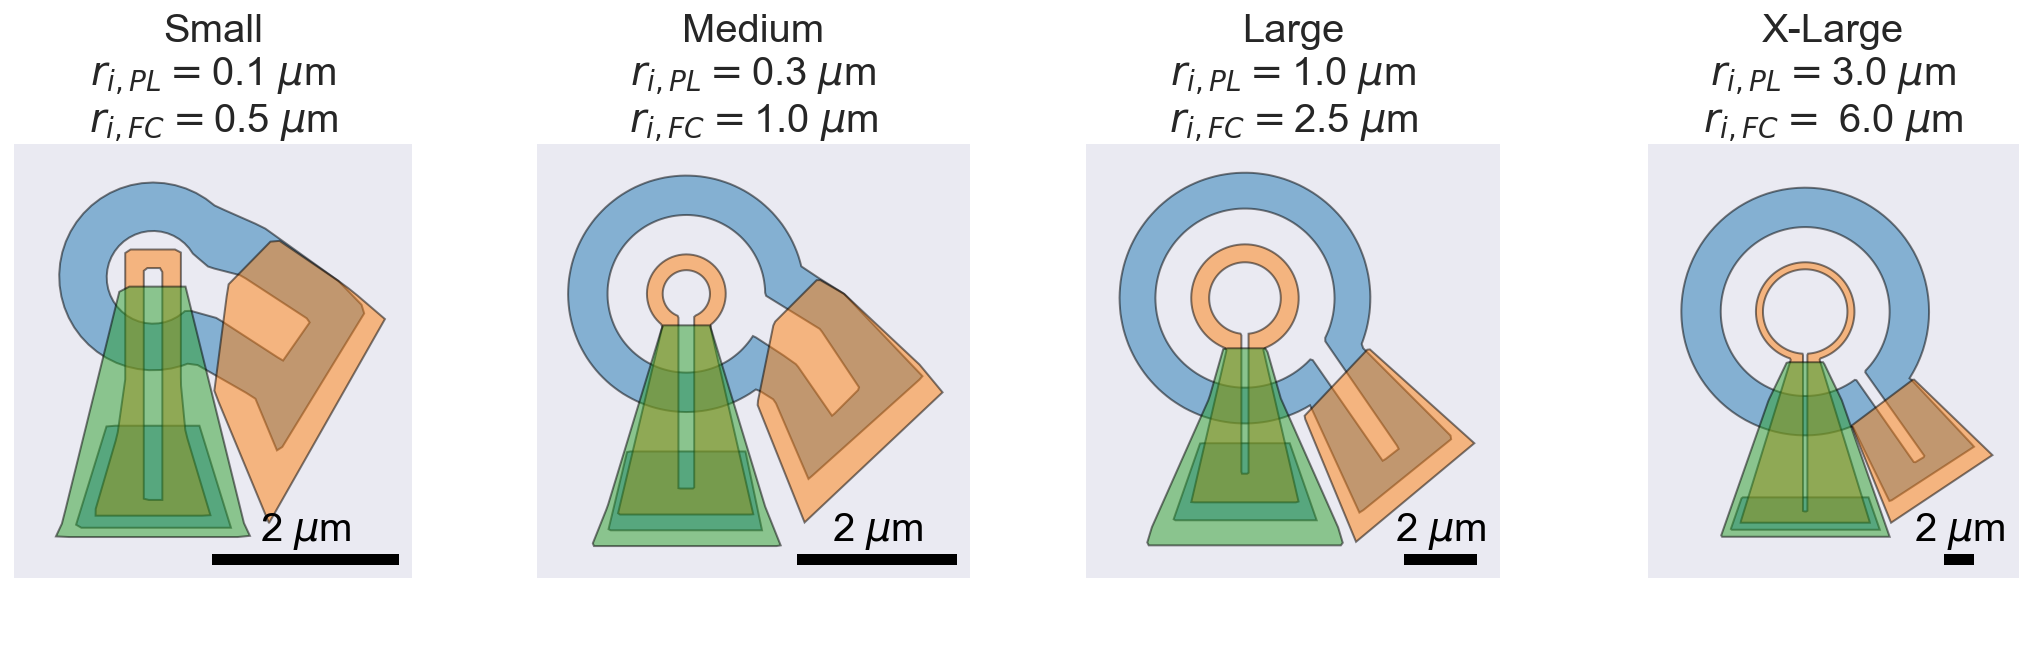

In [25]:
fig, axes = plt.subplots(1, len(squid_funcs), figsize=(15, 4), constrained_layout=True)

for ax, (name, make_squid), scale in zip(axes, squid_funcs.items(), [2, 2, 2, 2]):
    squid = make_squid()
    squid.draw(ax=ax, exclude=exclude, layer_order="decreasing", alpha=0.5)
    ax.set_title(name, fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ymin, ymax = ax.get_ylim()
    scalebar = AnchoredSizeBar(
        transform=ax.transData,
        size=scale,
        size_vertical=(ymax - ymin) / 50,
        loc="lower right",
        label=f"{scale} {um}",
        color="k",
        frameon=False,
        label_top=True,
        pad=0.25,
        fontproperties=fm.FontProperties(size=20),
    )
    ax.add_artist(scalebar)

handles = axes[-1].artists[::2]
labels = ["BE", "W1", "W2"]
fig.legend(
    handles, labels, bbox_to_anchor=(0.5, 0), loc="upper center", ncol=3, fontsize=20
)

In [26]:
min_points = 6000
optimesh_steps = 20
iterations = 10

solve_times = {}
all_fluxoids = {}
all_solutions = {}
all_mutuals = {}
I_fc = sc.Device.ureg("1 mA")

for name, make_squid in squid_funcs.items():
    squid = make_squid(align_layers="bottom")
    squid.make_mesh(min_points=min_points, optimesh_steps=optimesh_steps)
    t0 = time.perf_counter()
    solutions = sc.solve(
        squid,
        circulating_currents={"fc_center": str(I_fc)},
        field_units="mT",
        current_units="mA",
        iterations=iterations,
    )
    t1 = time.perf_counter()
    solve_times[name] = t1 - t0
    all_solutions[name] = solutions[-1]
    all_mutuals[name] = []
    all_fluxoids[name] = []
    for solution in solutions:
        phi = solution.hole_fluxoid("pl_center")
        M = (sum(phi) / I_fc).to("Phi_0 / A")
        print(M, flush=True)
        all_mutuals[name].append(M.magnitude)
        all_fluxoids[name].append(phi)
    del squid
    del solutions

INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Optimizing mesh with 6624 vertices.
INFO:superscreen.device.device:Finished generating mesh with 6624 points and 13003 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.
INFO:superscreen.device.device:Calculating gradient matrix.
INFO:superscreen.solve:Calculating W2 response to applied field.
INFO:superscreen.solve:Calculating W1 response to applied field.
INFO:superscreen.solve:Calculating BE response to applied field.
INFO:superscreen.solve:Caching 3 layer-to-layer kernel(s) (1004 MB total) in memory.
INFO:superscreen.solve:Calculating W2 response to applied field and screening field from other layers (1/10).
INFO:superscreen.solve:Calculating W1 response to applied field and screening field from other layers (1/10).
INFO:superscreen.solve:Calculating BE response to ap

0.0 magnetic_flux_quantum / ampere
78.72251312473236 magnetic_flux_quantum / ampere
73.80401534801598 magnetic_flux_quantum / ampere
72.12666039925044 magnetic_flux_quantum / ampere
72.3618773141517 magnetic_flux_quantum / ampere
72.23709895961142 magnetic_flux_quantum / ampere
72.26161954494282 magnetic_flux_quantum / ampere
72.2526670270927 magnetic_flux_quantum / ampere
72.2546522761351 magnetic_flux_quantum / ampere
72.2540074519791 magnetic_flux_quantum / ampere
72.2541604388142 magnetic_flux_quantum / ampere


INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Optimizing mesh with 6225 vertices.
/Users/LoganBVH/opt/anaconda3/envs/superscreen/lib/python3.9/site-packages/meshplex/_mesh_tri.py:345: UserWarning: There are 3 remaining non-Delaunay facets. The signed circumcenter distances are [-7.979727989493313e-17, -1.4224732503009818e-16, -8.500145032286355e-17]. This can happen due to round-off errors or to prevent non-manifold edges in shell meshes.
  warnings.warn(
INFO:superscreen.device.device:Finished generating mesh with 6225 points and 12233 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.
INFO:superscreen.device.device:Calculating gradient matrix.
INFO:superscreen.solve:Calculating W2 response to applied field.
INFO:superscreen.solve:Calculating W1 response to applied field.
INFO:superscreen.solve:Calculating BE respon

0.0 magnetic_flux_quantum / ampere
173.86616388589914 magnetic_flux_quantum / ampere
166.6282924740905 magnetic_flux_quantum / ampere
163.75714927689083 magnetic_flux_quantum / ampere
164.27355155212643 magnetic_flux_quantum / ampere
163.93996050167166 magnetic_flux_quantum / ampere
164.0281998426622 magnetic_flux_quantum / ampere
163.9898321371131 magnetic_flux_quantum / ampere
164.00176968711332 magnetic_flux_quantum / ampere
163.9971324970539 magnetic_flux_quantum / ampere
163.9986896977982 magnetic_flux_quantum / ampere


INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Optimizing mesh with 6490 vertices.
/Users/LoganBVH/opt/anaconda3/envs/superscreen/lib/python3.9/site-packages/meshplex/_mesh_tri.py:345: UserWarning: There are 4 remaining non-Delaunay facets. The signed circumcenter distances are [-2.0816681711721685e-17, -2.0816681711721685e-17, -1.700029006457271e-16, -1.3877787807814457e-17]. This can happen due to round-off errors or to prevent non-manifold edges in shell meshes.
  warnings.warn(
INFO:superscreen.device.device:Finished generating mesh with 6490 points and 12764 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.
INFO:superscreen.device.device:Calculating gradient matrix.
INFO:superscreen.solve:Calculating W2 response to applied field.
INFO:superscreen.solve:Calculating W1 response to applied field.
INFO:superscreen.s

0.0 magnetic_flux_quantum / ampere
613.551543983161 magnetic_flux_quantum / ampere
600.2871384296817 magnetic_flux_quantum / ampere
589.2959200590681 magnetic_flux_quantum / ampere
596.0321721234407 magnetic_flux_quantum / ampere
589.529097856422 magnetic_flux_quantum / ampere
593.9239675928425 magnetic_flux_quantum / ampere
590.4605336194684 magnetic_flux_quantum / ampere
592.9582282253871 magnetic_flux_quantum / ampere
591.055568014926 magnetic_flux_quantum / ampere
592.4654861168447 magnetic_flux_quantum / ampere


INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Optimizing mesh with 6058 vertices.
/Users/LoganBVH/opt/anaconda3/envs/superscreen/lib/python3.9/site-packages/meshplex/_mesh_tri.py:345: UserWarning: There are 3 remaining non-Delaunay facets. The signed circumcenter distances are [-1.3253287356462806e-15, -7.979727989493313e-16, -5.273559366969494e-16]. This can happen due to round-off errors or to prevent non-manifold edges in shell meshes.
  warnings.warn(
INFO:superscreen.device.device:Finished generating mesh with 6058 points and 11925 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.
INFO:superscreen.device.device:Calculating gradient matrix.
INFO:superscreen.solve:Calculating W2 response to applied field.
INFO:superscreen.solve:Calculating W1 response to applied field.
INFO:superscreen.solve:Calculating BE respon

0.0 magnetic_flux_quantum / ampere
1659.4777583347052 magnetic_flux_quantum / ampere
1673.107589014473 magnetic_flux_quantum / ampere
1642.3089827883884 magnetic_flux_quantum / ampere
1655.7806939870668 magnetic_flux_quantum / ampere
1641.4000968812534 magnetic_flux_quantum / ampere
1647.715490281394 magnetic_flux_quantum / ampere
1641.8532774934326 magnetic_flux_quantum / ampere
1644.6725989926863 magnetic_flux_quantum / ampere
1642.2045081476574 magnetic_flux_quantum / ampere
1643.5279817706514 magnetic_flux_quantum / ampere


<ipython-input-27-c3f6adee7309>:50: UserWarning: Legend does not support <mpl_toolkits.axes_grid1.anchored_artists.AnchoredSizeBar object at 0x7fd51fde56a0> instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc="upper left", fontsize=18)
<ipython-input-27-c3f6adee7309>:71: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(im, cax=cax)


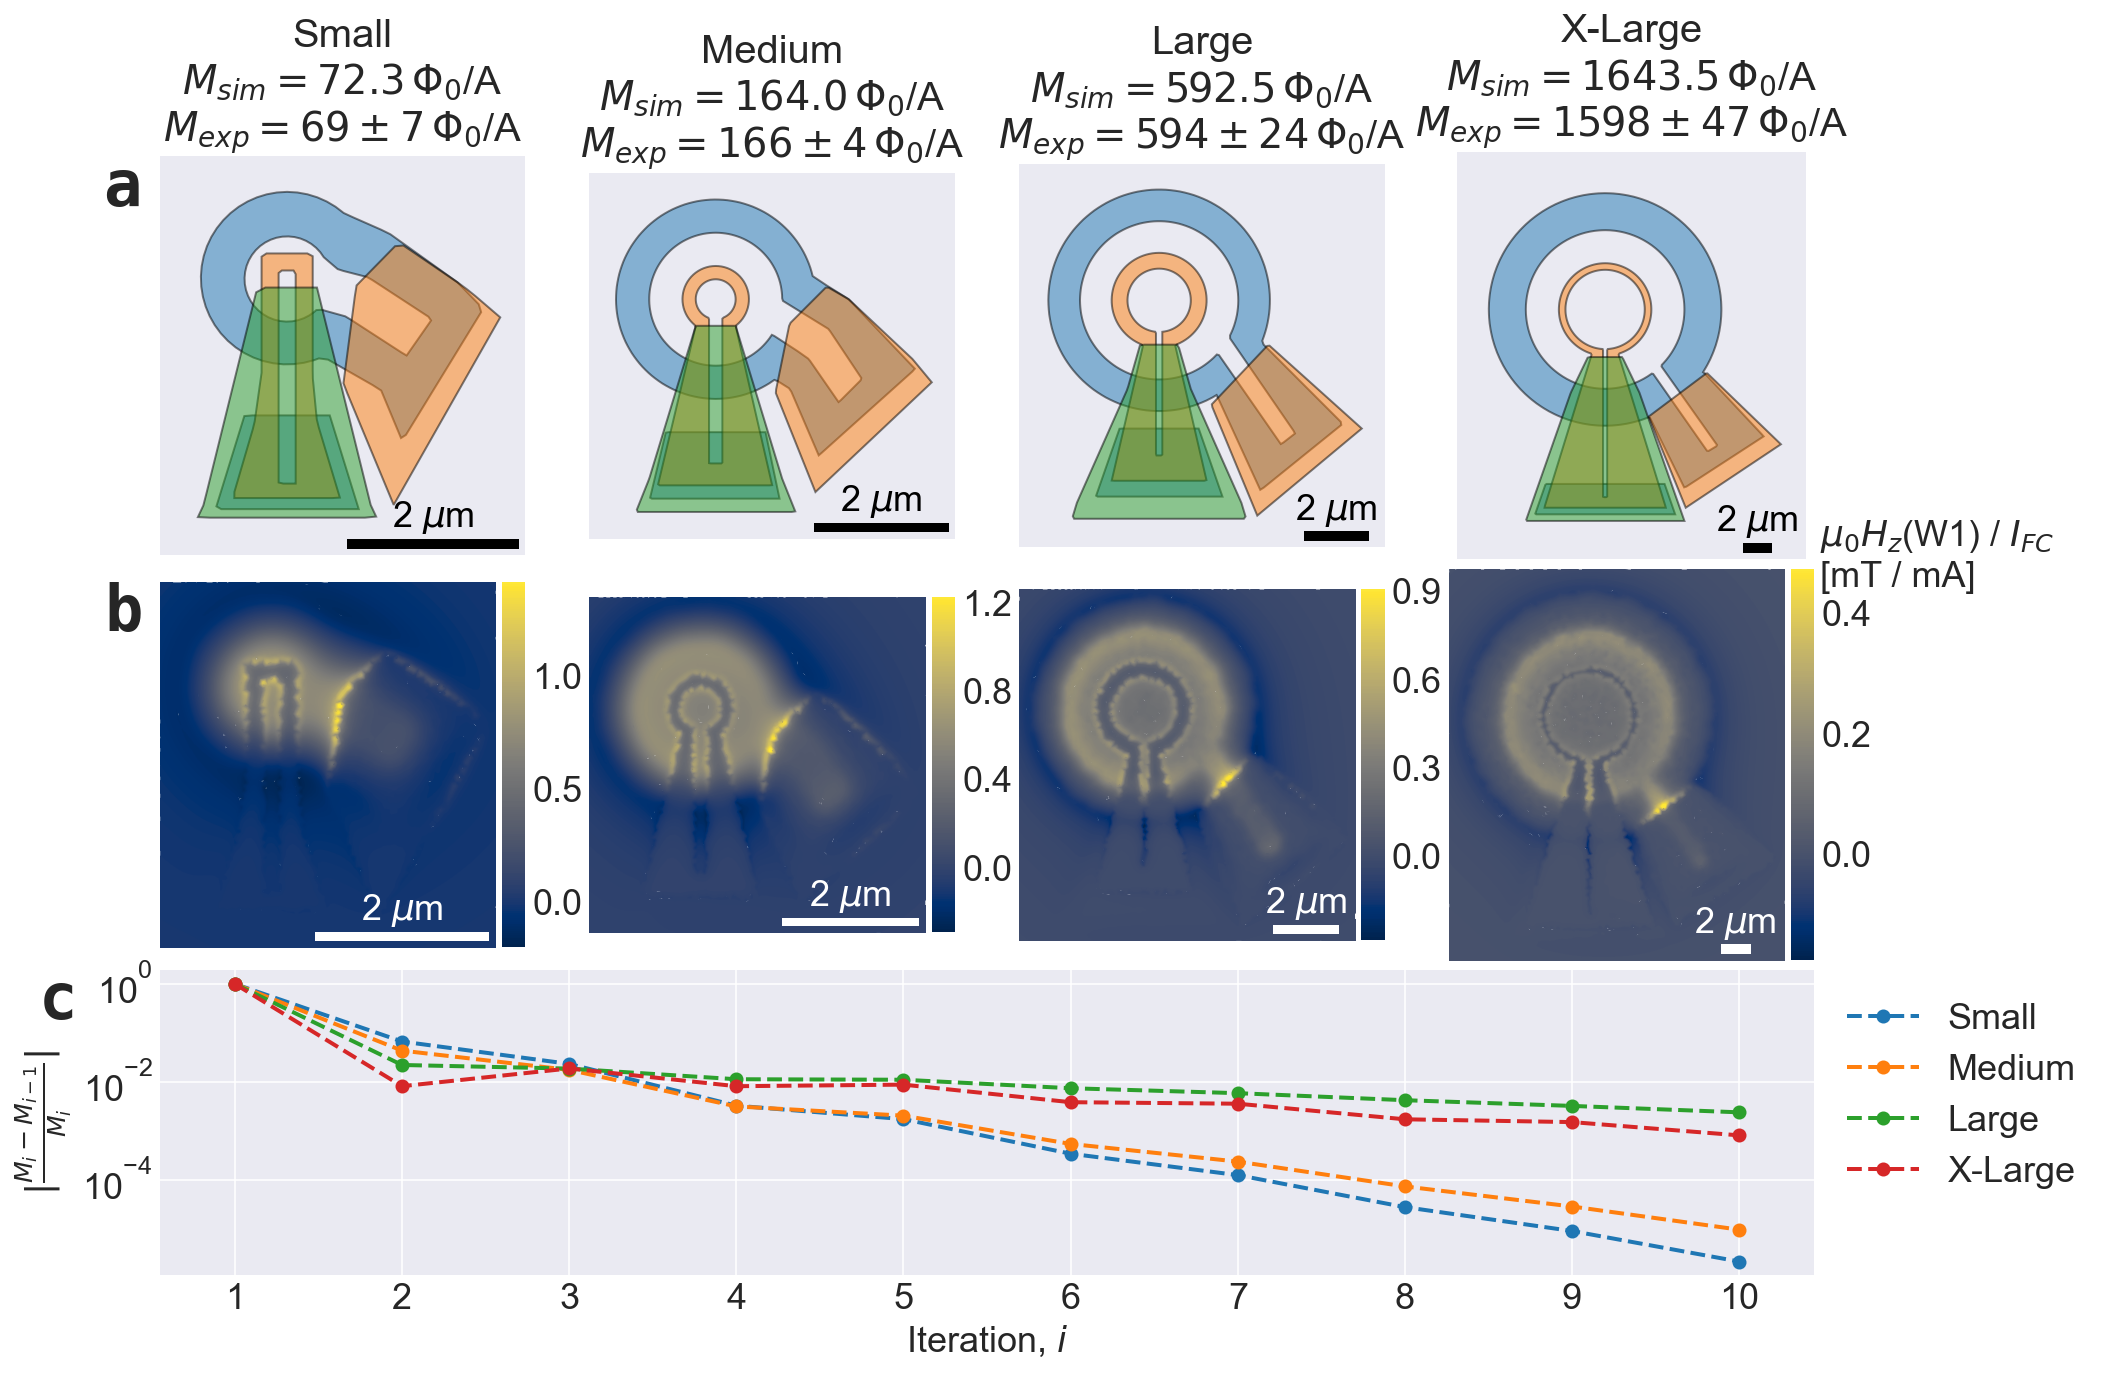

In [27]:
# See Table 1 (second to last column) of https://arxiv.org/pdf/1605.09483.pdf
exp_mutuals = [(69, 7), (166, 4), (594, 24), (1598, 47), (1000, 50)]

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, len(squid_funcs), height_ratios=[1, 1, 0.75])

scale = 2
scalebar_kwargs = dict(
    size=scale,
    loc="lower right",
    label=f"{scale} {um}",
    frameon=False,
    label_top=True,
    pad=0.1,
    fontproperties=fm.FontProperties(size=18),
)
rows = []
axes = []

row = [fig.add_subplot(gs[0, i]) for i, _ in enumerate(squid_funcs)]
rows.append(row)
axes.extend(row)

for ax, (name, make_squid), (nom, err) in zip(row, squid_funcs.items(), exp_mutuals):
    squid = make_squid()
    squid.draw(ax=ax, exclude=exclude, layer_order="decreasing", alpha=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ymin, ymax = ax.get_ylim()
    scalebar = AnchoredSizeBar(
        transform=ax.transData,
        size_vertical=(ymax - ymin) / 50,
        color="k",
        **scalebar_kwargs,
    )
    ax.add_artist(scalebar)
    mutuals = all_mutuals[name]
    title = name + (
        f"\n$M_{{sim}} = {{{mutuals[-1]:.1f}}}\\,\\Phi_0$/A"
        f"\n$M_{{exp}} = {{{nom:.0f}}}\\pm{{{err:.0f}}}\\,\\Phi_0$/A"
    )
    title_split = title.split("\n")
    title = "\n".join(title_split[:1] + title_split[-2:])
    ax.set_title(title, fontsize=20)

handles = ax.artists[::2]
labels = ["BE", "W1", "W2"]
ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc="upper left", fontsize=18)

row = [fig.add_subplot(gs[1, i]) for i, _ in enumerate(squid_funcs)]
rows.append(row)
axes.extend(row)

for ax, (name, solution) in zip(row, all_solutions.items()):
    device = solution.device
    points = device.points
    triangles = device.triangles
    hz = solution.field_at_position(points, zs=device.layers["W1"].z0).to("mT")
    hz = (hz / I_fc).to("mT / mA").magnitude
    vmin, vmax = sc.visualization.auto_range_iqr(hz, 0.01)
    levels = np.linspace(vmin, vmax, 201)
    ax.set_aspect("equal")
    im = ax.tricontourf(
        points[:, 0], points[:, 1], triangles, hz, cmap="cividis", levels=levels
    )
    for pc in im.collections:
        pc.set_edgecolor("face")
    cax = make_axes_locatable(ax).append_axes("right", size="7%", pad="2%")
    cbar = fig.colorbar(im, cax=cax)
    tick_locator = ticker.MaxNLocator(nbins=4)
    cbar.locator = tick_locator
    cbar.update_ticks()
    ax.axis("off")
    ymin, ymax = ax.get_ylim()
    scalebar = AnchoredSizeBar(
        transform=ax.transData,
        size_vertical=(ymax - ymin) / 50,
        color="w",
        **scalebar_kwargs,
    )
    ax.add_artist(scalebar)

cbar.ax.set_title(
    "$\\mu_0H_z$(W1) / $I_{FC}$\n[mT / mA]",
    fontsize=18,
    loc="right",
    y=0.925,
    x=1.25,
    ha="left",
)

ax = fig.add_subplot(gs[2, :])
rows.append([ax])
axes.append(ax)

for (name, mutuals) in all_mutuals.items():
    iters = np.arange(iterations + 1)
    delta_M = np.abs(np.diff(mutuals))
    delta_M = delta_M / np.abs(mutuals[1:])
    ax.plot(iters[1:], delta_M, "o--", lw=2, label=name.split("\n")[0])
    ax.set_yscale("log")
    ax.set_xticks(iters[1:])
    label = "$\\left\\|\\frac{M_{i} - M_{i-1}}{M_{i}}\\right\\|$"
ax.set_ylabel(label, fontsize=18)
ax.set_xlabel("Iteration, $i$")

ax.legend(bbox_to_anchor=(1, 1), fontsize=18)

for row, label in zip(rows, string.ascii_lowercase):
    ax = row[0]
    ax.text(
        -0.05,
        1,
        label,
        family="monospace",
        weight="bold",
        size=32,
        transform=ax.transAxes,
        ha="right",
        va="top",
    )

fig.tight_layout()
fig.subplots_adjust(hspace=0.005, wspace=0.175)

if SAVE_FIGURES:
    fig.savefig("../images/squid-mutuals.pdf", bbox_inches="tight")

## Figure 6: SQUID susceptometry image of a SQUID susceptometer

#### Table of Contents

- [superscreen.Parameter demo](#Parameter-demo)
- [Figure 1: Ring with a slit (Code Block 1)](#Figure-1:-Ring-with-a-slit-(Code-Block-1))
- [Figure 2: Fluxoid optimization](#Figure-2:-Fluxoid-optimization)
- [Figure 3: Pearl Vortices](#Figure-3:-Pearl-Vortices)
- [Figure 4: Ring self-inductance](#Figure-4:-Ring-self-inductance)
- [Figure 5: SQUID mutual inductance](#Figure-5:-SQUID-mutual-inductance)
- **[Figure 6: SQUID susceptometry image of a SQUID susceptometer](#Figure-6:-SQUID-susceptometry-image-of-a-SQUID-susceptometer)**

In [28]:
from scipy.io import loadmat
from scipy import ndimage
from scipy import optimize

from scripts.squid_image_row import flip_device

ureg = sc.ureg
ureg.define("Phi0 = Phi_0")

### Load measured scanning SQUID data

This data was measured on 2018-07-25 at 4 K in a cryogen-free scanning SQUID microscope described in this reference: https://aip.scitation.org/doi/10.1063/1.5085008. Both the "sensor" SQUID and the "sample" SQUID are susceptometers described in this reference: (https://aip.scitation.org/doi/10.1063/1.4961982, https://arxiv.org/abs/1605.09483), with pickup loop inner diameters of 0.6 micron [Figure 4(b)] and 2 micron [Figure (4(c)], respectively.

In scanning SQUID microscopy there are several channels of data recorded simulataneously as a function of the relative $(x, y)$ position between the SQUID sensor and the sample: MAG (DC magnetometry, units of m$\Phi_0$), SUSCX (in-phase susceptiblity, units of $\Phi_0$ / A), SUSCY (out-of-phase susceptibility, units of $\Phi_0$ / A). SUSCX and SUSCY are measured with a lockin amplifier, where the reference/excitiation is a low-frequency AC current in the (sensor) SQUID field coil.

In [29]:
measured_data = loadmat(
    "../data/2018-07-25/#061_scan_15-26-29/scan0.mat",
    simplify_cells=True,
)

In [30]:
dxdV = ureg("14.5 um / V")
dydV = ureg("15.5 um / V")

xs = (measured_data["x"]["array"] * ureg(measured_data["x"]["unit"]) * dxdV).to("um")
ys = (measured_data["y"]["array"] * ureg(measured_data["y"]["unit"]) * dydV).to("um")

channel_names = ["MAG", "SUSCX", "SUSCY"]

channels = {
    name: measured_data[name]["array"] * ureg(measured_data[name]["unit"])
    for name in channel_names
}

<ipython-input-31-acea109c8caa>:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(x, y, z.m, **kwargs)
<ipython-input-31-acea109c8caa>:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(im, cax=cax, orientation="horizontal")


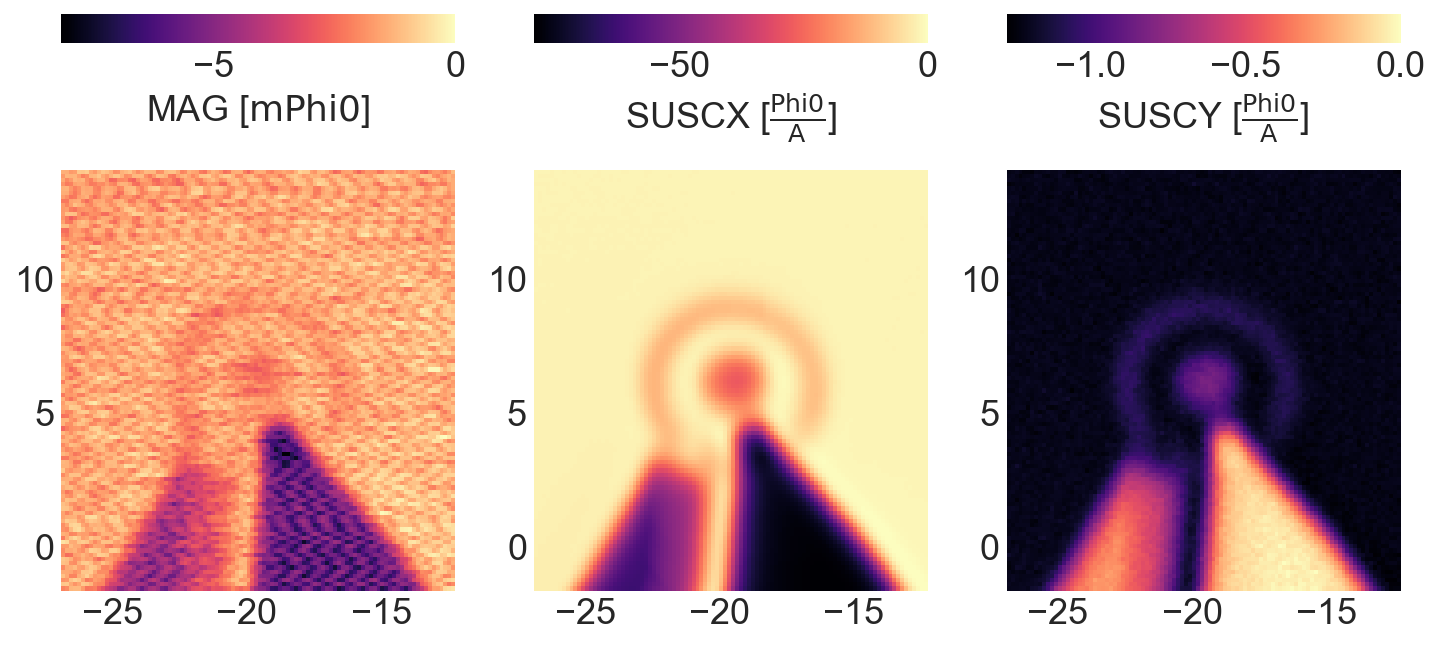

In [31]:
fig, axes = plt.subplots(1, len(channel_names), figsize=(12, 6))

kwargs = dict(
    shading="auto",
    cmap="magma",
)

for (name, array), ax in zip(channels.items(), axes):
    ax.set_aspect("equal")
    x = xs.m
    y = ys.m
    z = array
    z = z - z.max()
    im = ax.pcolormesh(x, y, z.m, **kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="7%", pad="30%")
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
    cbar.set_label(f"{name} [${z.units:~L}$]")

### Correct offset phase in susceptometry data

We expect no physical out-of-phase magnetic response because the sample is a superconductor well below its critical temperature. The measured out-of-phase susceptibility SUSCY simply reflects a constant phase offset due to wiring, as can be seen below from the fact that SUSCY varies linearly with SUSCX. We correct for that phase offset here and verify that, after correction, the remaining signal in the SUSCY channel is consistent with Gaussian noise.

Text(0.5, 1.0, 'Offset phase = -1.523e-02 radians')

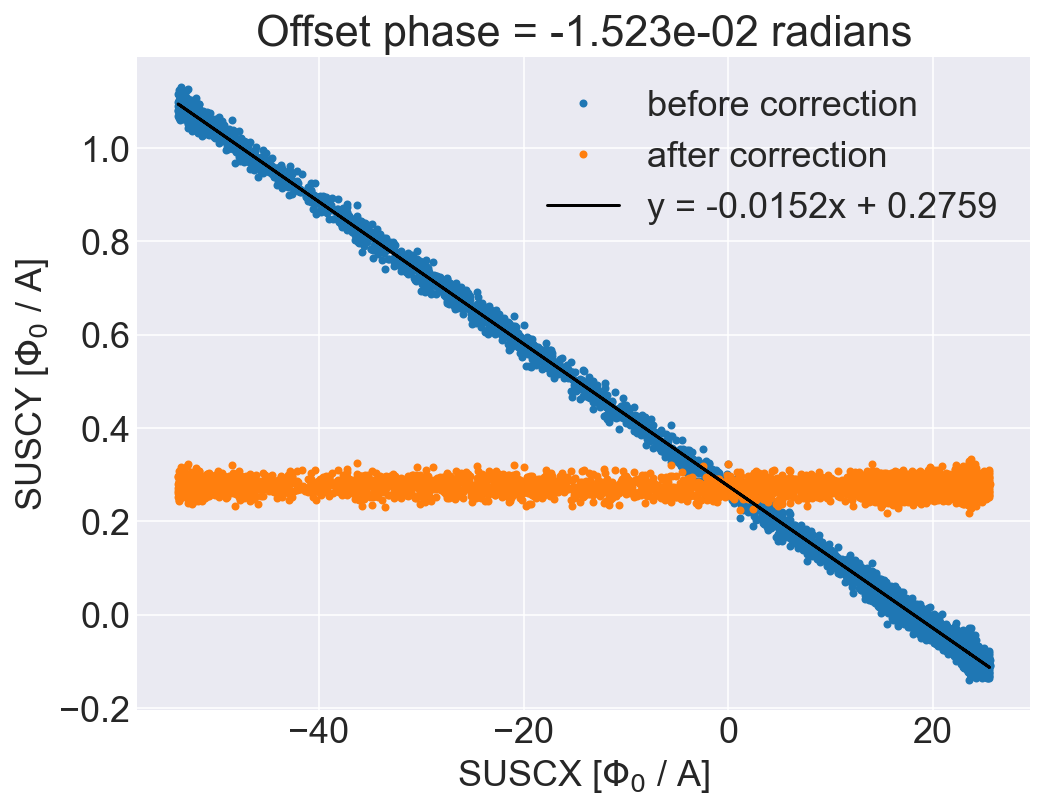

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

re = channels["SUSCX"].m
im = channels["SUSCY"].m

zs = re + 1j * im

slope, ofs = np.polyfit(zs.real.ravel(), zs.imag.ravel(), 1)
theta = np.arctan(slope)

ax.plot(zs.real.ravel(), zs.imag.ravel(), ".", label="before correction")

zs_corrected = zs * np.exp(-1j * theta)
ax.plot(
    zs_corrected.real.ravel(), zs_corrected.imag.ravel(), ".", label="after correction"
)

ax.plot(
    zs.real.ravel(),
    slope * zs.real.ravel() + ofs,
    "k-",
    label=f"y = {slope:.4f}x + {ofs:.4f}",
)

suscx = zs_corrected.real
suscy = zs_corrected.imag

ax.set_xlabel("SUSCX [$\\Phi_0$ / A]")
ax.set_ylabel("SUSCY [$\\Phi_0$ / A]")
ax.legend(loc=0)

ax.set_title(f"Offset phase = {theta:.3e} radians")

<ipython-input-33-8a9c12ab91c4>:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(x, y, z.m, **kwargs)
<ipython-input-33-8a9c12ab91c4>:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(im, cax=cax, orientation="horizontal")


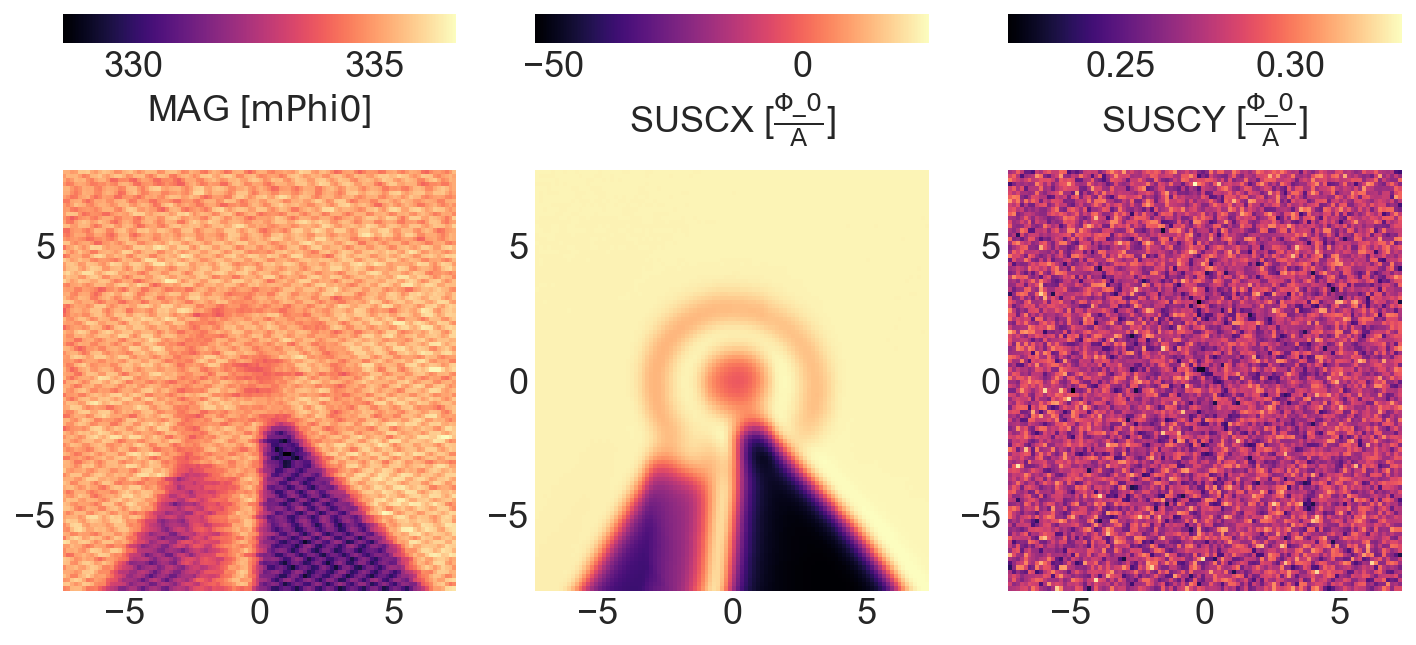

In [33]:
fig, axes = plt.subplots(1, len(channel_names), figsize=(12, 6))

kwargs = dict(
    shading="auto",
    cmap="magma",
)
import superscreen as sc

for (name, array), ax in zip(channels.items(), axes):
    ax.set_aspect("equal")
    # Center x and y at the origin
    x = xs.m
    x = x - x.mean()
    y = ys.m
    y = y - y.mean()
    z = array
    if name == "SUSCX":
        z = suscx * ureg("Phi_0 / A")
    if name == "SUSCY":
        z = suscy * ureg("Phi_0 / A")
    im = ax.pcolormesh(x, y, z.m, **kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="7%", pad="30%")
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
    cbar.set_label(f"{name} [${z.units:~L}$]")

Compare residual signal in SUSCY channel to Gaussian noise:

Text(0, 0.5, 'Pixel counts')

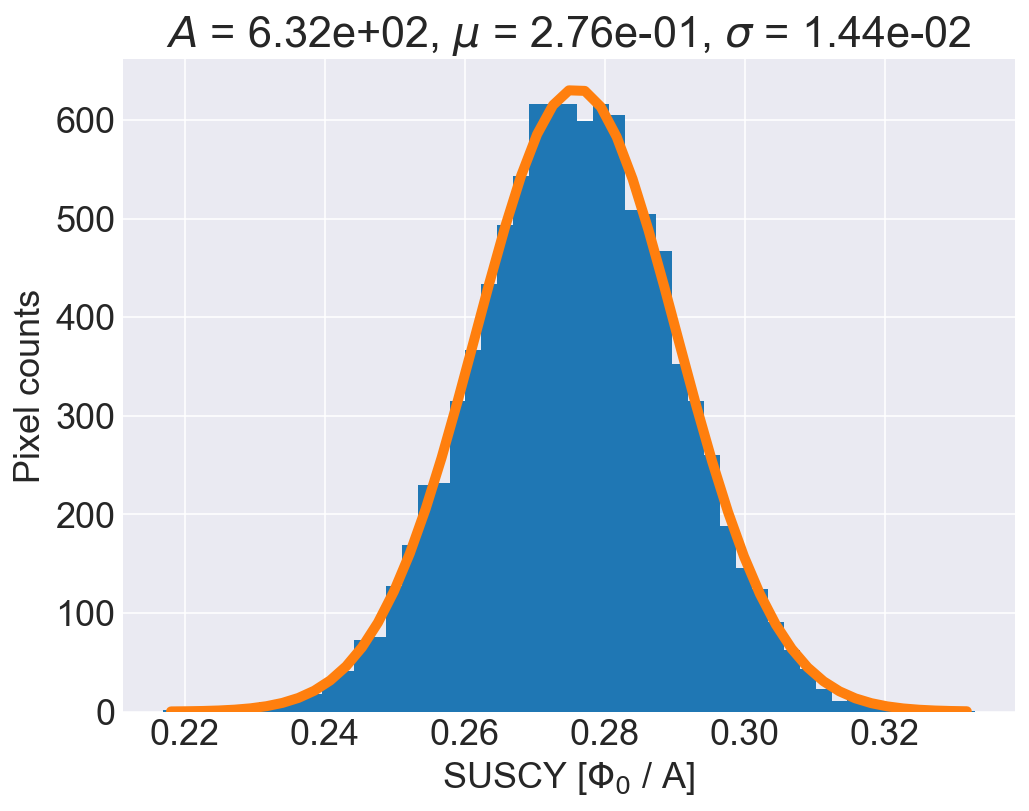

In [34]:
z = suscy.ravel()

num_bins = 51
counts, edges = np.histogram(z, bins=num_bins)
bin_centers = (edges[:-1] + edges[1:]) / 2


def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2.0 * sigma**2))


# p0 is the initial guess for the fitting coefficients (A, mu, and sigma above)
p0 = [600, 0.0, 0.05]

popt, cov = optimize.curve_fit(gaussian, bin_centers, counts, p0=p0)
hist_fit = gaussian(bin_centers, *popt)

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(z, bins=num_bins)
ax.plot(bin_centers, hist_fit, "-", lw=5)
ax.set_title(
    ", ".join([f"{l} = {p:.2e}" for l, p in zip(["$A$", "$\\mu$", "$\\sigma$"], popt)])
)
ax.set_xlabel("SUSCY [$\\Phi_0$ / A]")
ax.set_ylabel("Pixel counts")

### Load simulated susceptometry results

In [35]:
results_path = os.path.join(os.pardir, "data", "47276907")
results = [f for f in os.listdir(results_path) if f.endswith("npz")]
num_rows = len(results)

flux_rows = []
susc_rows = []
xs = None
ys = None
for path in sorted(results, key=lambda s: int(s.split("_")[1].split(".")[0])):
    if not path.endswith("npz"):
        continue
    fn = os.path.join(results_path, path)
    with np.load(fn) as data:
        if xs is None:
            xs = data["xs"]
        if ys is None:
            ys = data["ys"]
        susc_rows.append(data["mutual"] - data["mutual_no_sample"])
        flux_rows.append(data["flux"] + data["supercurrent"])

flux = np.stack(flux_rows, axis=0)
susc = np.stack(susc_rows, axis=0)

In [36]:
# Correct for offset in measured susceptibility due to imbalanced
# front and back field coil - pickup loop pairs.
# With this correction, SUSCX = 0 means no magnetic response from the sample
# and SUSCX < 0 means diamagnetic response.
z = suscx - suscx[-1, :].mean()
# Rotate measured susceptibility to match orientation of the simulation
z = ndimage.rotate(z, 20, reshape=False, cval=np.nan)

kwargs = dict(
    shading="auto",
    cmap="magma",
    vmin=min(np.nanmin(susc), np.nanmin(z)),
    vmax=0,
)

cbar_kwargs = dict(size="5%", pad="2%")

fig, (ax, bx, cx, dx) = plt.subplots(
    1,
    4,
    figsize=(13.5, 4),
    sharex=True,
    sharey=True,
    constrained_layout=True,
)

squid = squids.medium.make_squid()
squid.abstract_regions_list = []
squid.draw(ax=ax, exclude="bounding_box", layer_order="decreasing")

sample = flip_device(squids.large.make_squid(), about_axis="y")
sample.draw(ax=bx, exclude="bounding_box", layer_order="decreasing", legend=False)


im = cx.pcolormesh(x, y + 0.25, z, **kwargs)
im.set_edgecolor("face")
divider = make_axes_locatable(cx)

im = dx.pcolormesh(xs, ys[:num_rows], susc - susc[-1, :].mean(), **kwargs)
im.set_edgecolor("face")
divider = make_axes_locatable(dx)

cb = fig.colorbar(im, ax=[ax, bx, cx, dx], location="right", aspect=20, pad=0.01)
cb.set_label("Susceptibility [$\\Phi_0$ / A]")
cb.solids.set_edgecolor("face")

for a in (ax, bx, cx, dx):
    a.set_aspect("equal")
    a.set_xlim(-4, 4)
    a.set_ylim(-5, 5)
    a.set_xticks([])
    a.set_yticks([])
    a.set_xlabel(None)
    a.set_ylabel(None)

fontprops = fm.FontProperties(size=20)

scalebar = AnchoredSizeBar(
    ax.transData,
    2,
    "2 $\\mu$m",
    "lower right",
    size_vertical=0.25,
    color="black",
    pad=0.25,
    frameon=False,
    label_top=True,
    fontproperties=fontprops,
)
ax.add_artist(scalebar)

ax.set_title("Sensor geometry")
bx.set_title("Sample geometry")
cx.set_title("Measurement")
dx.set_title("Simulation")

for a, label in zip([ax, bx, cx, dx], string.ascii_lowercase):
    a.text(
        0.025,
        0.975,
        label,
        transform=a.transAxes,
        weight="bold",
        size=32,
        ha="left",
        va="top",
    )

if SAVE_FIGURES:
    fig.savefig("../images/squid-susc-simulation.pdf", dpi=600, bbox_inches="tight")

<ipython-input-36-a05e517377ec>:35: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = cx.pcolormesh(x, y + 0.25, z, **kwargs)
<ipython-input-36-a05e517377ec>:39: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = dx.pcolormesh(xs, ys[:num_rows], susc - susc[-1, :].mean(), **kwargs)
<ipython-input-36-a05e517377ec>:43: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(im, ax=[ax, bx, cx, dx], location="right", aspect=20, pad=0.01)
